In [2]:
!pip install pdfplumber

  Obtaining dependency information for pdfplumber from https://files.pythonhosted.org/packages/ee/ec/315015b6c4667d889cc14348c93e31f9fd43a6f61162b85c39e4a21018d5/pdfplumber-0.11.0-py3-none-any.whl.metadata
  Obtaining dependency information for pdfminer.six==20231228 from https://files.pythonhosted.org/packages/eb/9c/e46fe7502b32d7db6af6e36a9105abb93301fa1ec475b5ddcba8b35ae23a/pdfminer.six-20231228-py3-none-any.whl.metadata
  Obtaining dependency information for pypdfium2>=4.18.0 from https://files.pythonhosted.org/packages/47/6d/c46239db8d0a1643b30fb68db37fb41e075f416236281e11ed2ff3746b8b/pypdfium2-4.28.0-py3-none-win_amd64.whl.metadata
     ---------------------------------------- 0.0/48.5 kB ? eta -:--:--
     ---------------------------------------- 48.5/48.5 kB ? eta 0:00:00
   ---------------------------------------- 0.0/56.4 kB ? eta -:--:--
   ---------------------------------------- 56.4/56.4 kB 3.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/5.6 MB ? eta 

# Political Party Analysis

In [29]:
import pdfplumber
import pandas as pd
import re

# Open the PDF file
with pdfplumber.open("FQNnfRpPQ9.pdf") as pdf:
    all_data = []
    for page in pdf.pages:
        text = page.extract_text()
        if text:
            for line in text.split('\n'):
                # Adjusted regular expression to better match the expected line format
                # This pattern assumes: Date Party Denomination (with flexible spaces and number formats)
                match = re.match(r'(\d+/\w+/\d{4})\s+(.*?)\s+([\d,\.]+)', line)
                if match:
                    date, party, denomination = match.groups()
                    # Remove commas or periods from the denomination for conversion to int
                    denomination_cleaned = denomination.replace(',', '').replace('.', '')
                    all_data.append([date, party, int(denomination_cleaned)])

# Convert the list of data into a DataFrame
df = pd.DataFrame(all_data, columns=['Date', 'Party', 'Denomination'])

# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

print(df.head())

        Date                                     Party  Denomination
0 2019-04-12  ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM       1000000
1 2019-04-12  ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM       1000000
2 2019-04-12  ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM      10000000
3 2019-04-12  ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM       1000000
4 2019-04-12  ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM       1000000


In [7]:
len(df)

20421

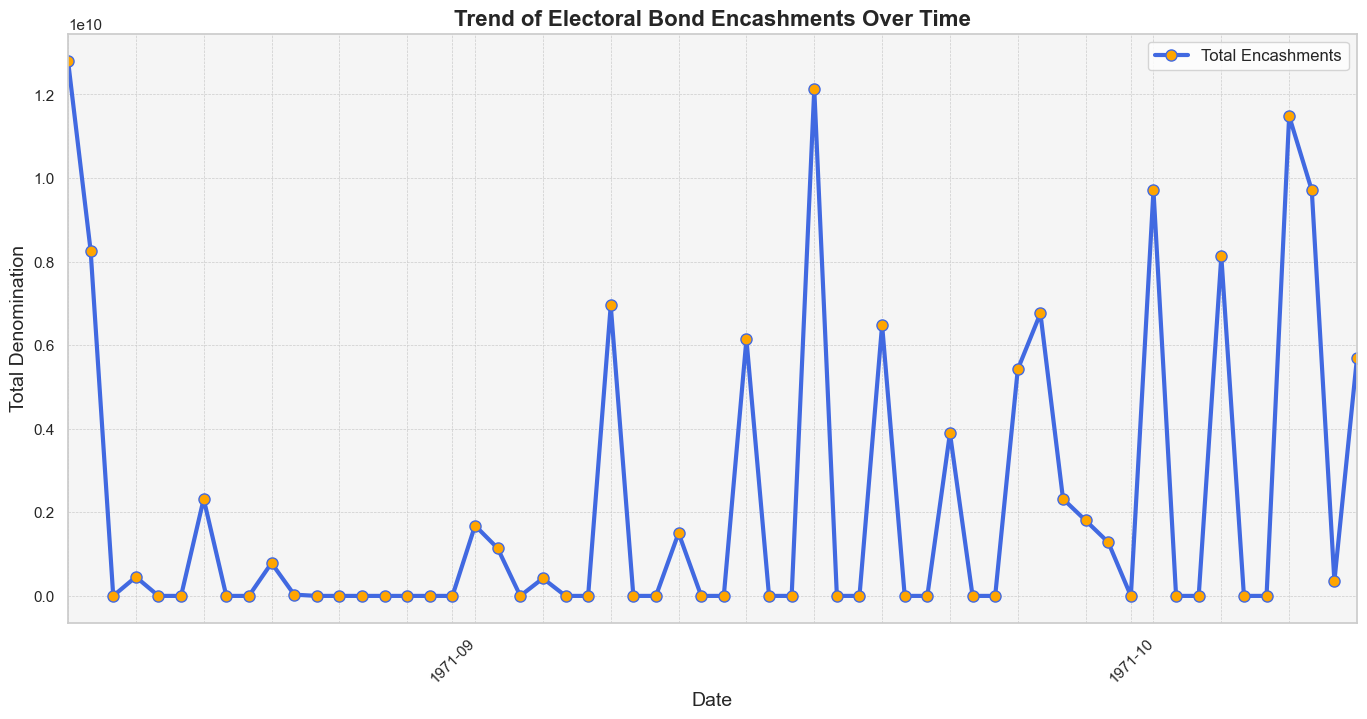

C:\Users\snehi\anaconda3\Lib\site-packages\pandas\plotting\_matplotlib\core.py:1400: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(left, right)


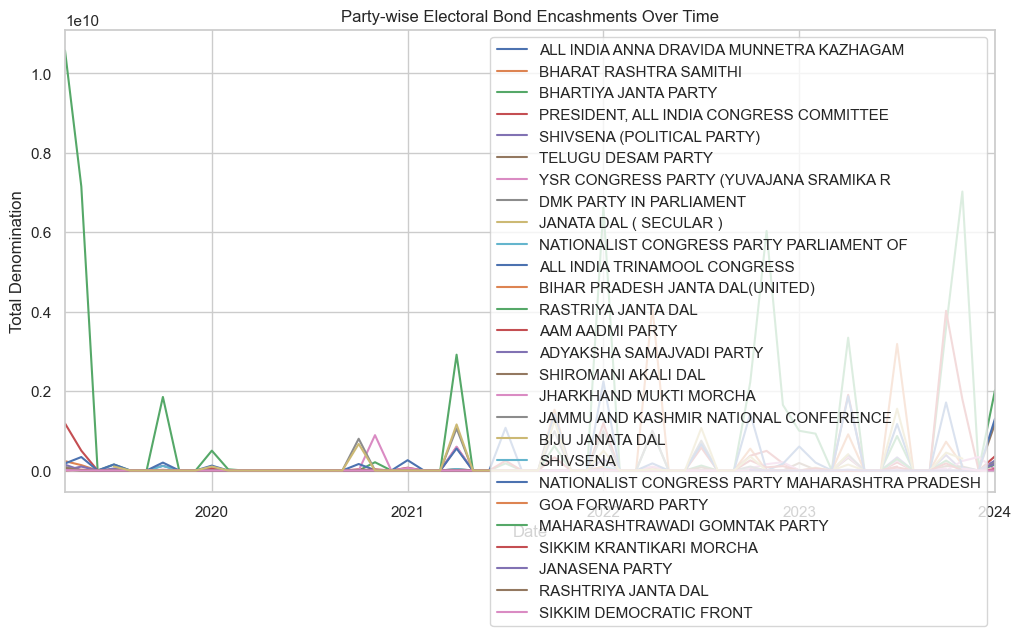

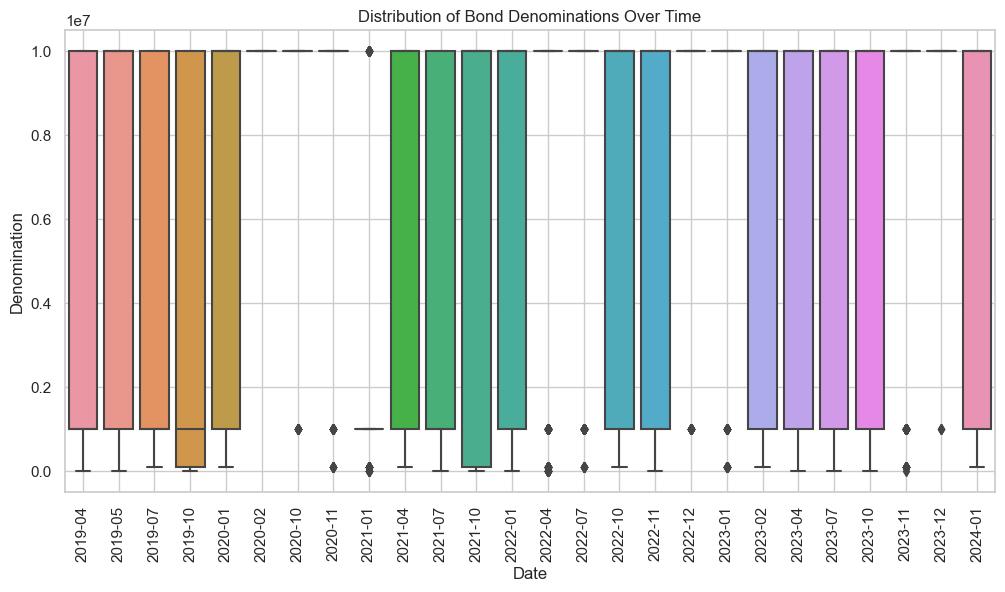

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure Date is the correct datetime type
df['Date'] = pd.to_datetime(df['Date'])

df_daily_sum = df.resample('M', on='Date')['Denomination'].sum()

plt.figure(figsize=(14, 7))
# Make the line thicker with linewidth and change the line style and color for better visibility
df_daily_sum.plot(linewidth=3, linestyle='-', color='royalblue', marker='o', markersize=8, markerfacecolor='orange')

# Enhancing the plot aesthetics further
plt.title('Trend of Electoral Bond Encashments Over Time', fontsize=16, fontweight='bold')
plt.ylabel('Total Denomination', fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()

# Improving date formatting on the x-axis
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=45)

# Adding a legend, in case you have multiple lines
plt.legend(["Total Encashments"], fontsize=12)

# Optional: Adding a background color to the plot area for contrast
plt.gca().set_facecolor('whitesmoke')
plt.savefig('overall_party.jpg')

plt.show()

# 2. Party-wise Analysis
plt.figure(figsize=(12, 6))
for party in df['Party'].unique():
    df_party = df[df['Party'] == party]
    df_party_resampled = df_party.resample('M', on='Date')['Denomination'].sum()
    df_party_resampled.plot(label=party)
plt.title('Party-wise Electoral Bond Encashments Over Time')
plt.ylabel('Total Denomination')
plt.xlabel('Date')
plt.legend()
plt.grid(True)
plt.show()

# 3. Distribution of Denominations
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['Date'].dt.to_period('M'), y='Denomination', data=df)
plt.title('Distribution of Bond Denominations Over Time')
plt.ylabel('Denomination')
plt.xlabel('Date')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

In [10]:
# Calculate total collection by party
total_collection_by_party = df.groupby('Party')['Denomination'].sum().sort_values(ascending=False)

# Identify top 4 parties
top_4_parties = total_collection_by_party.head(4).index.tolist()
print("Top 4 parties by total bond encashment:", top_4_parties)

# Filter DataFrame for only top 4 parties
df_top_4 = df[df['Party'].isin(top_4_parties)]

# Continue with the plots for these parties

Top 4 parties by total bond encashment: ['BHARTIYA JANTA PARTY', 'ALL INDIA TRINAMOOL CONGRESS', 'PRESIDENT, ALL INDIA CONGRESS COMMITTEE', 'BHARAT RASHTRA SAMITHI']


C:\Users\snehi\AppData\Local\Temp\ipykernel_2028\1875481949.py:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Date', y='Denomination', hue='Party', data=df_top_4, estimator='sum', ci=None, linewidth=3.5, marker='o', markersize=8)


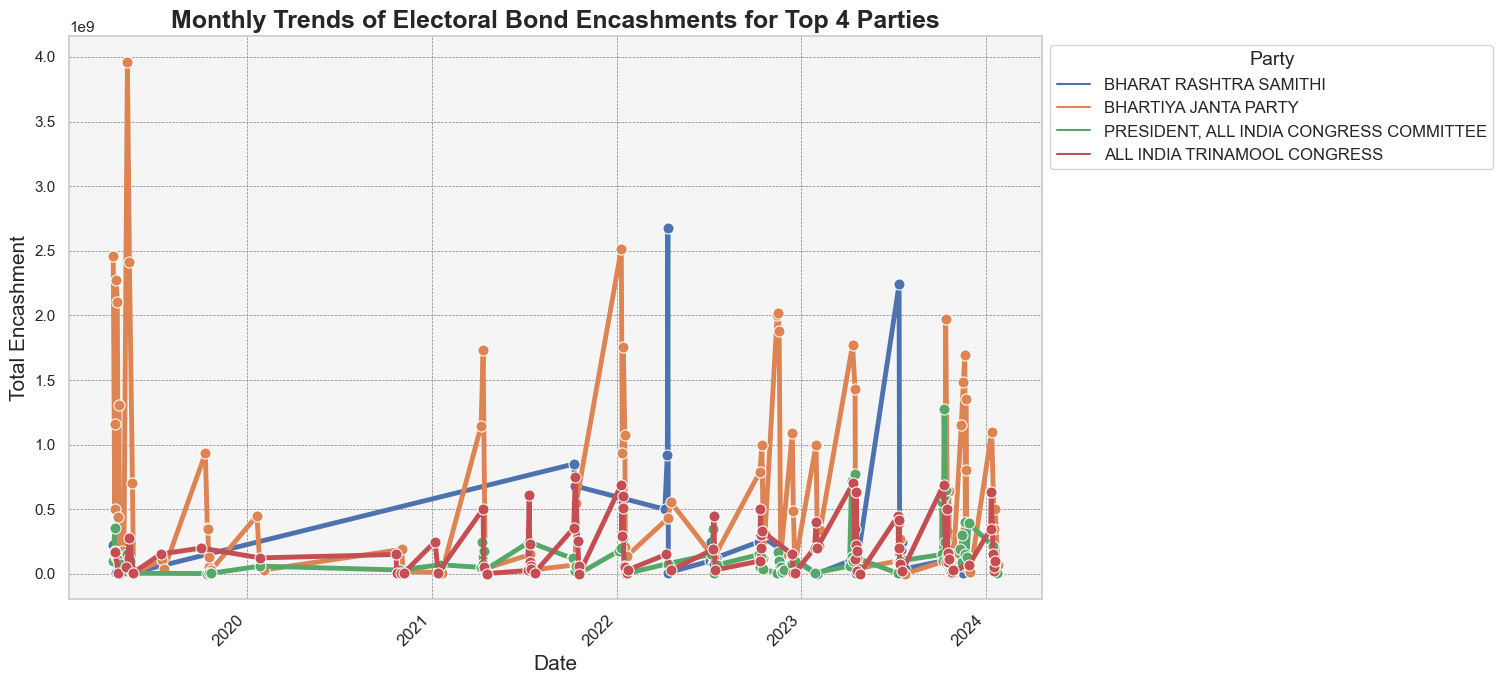

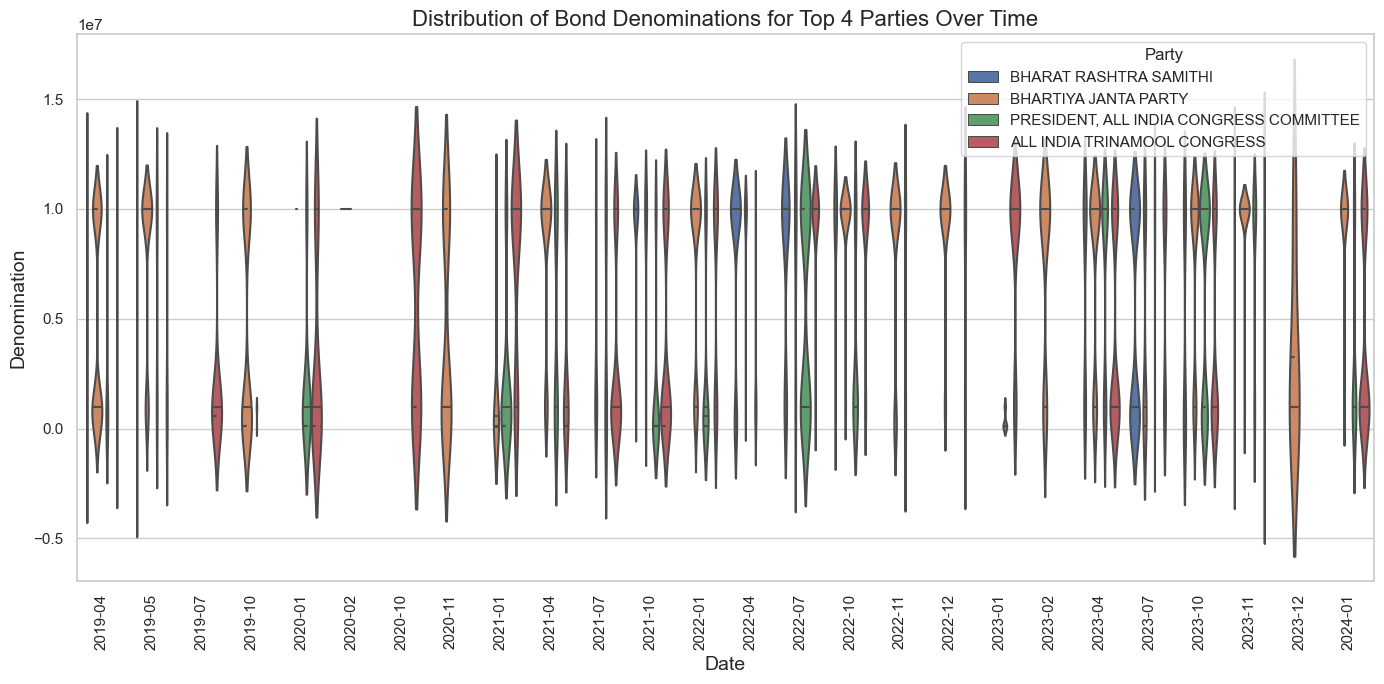

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Assuming df_top_4 has already been filtered for the top 4 parties

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

plt.figure(figsize=(14, 7))

# Increase linewidth for better visibility and use markers
sns.lineplot(x='Date', y='Denomination', hue='Party', data=df_top_4, estimator='sum', ci=None, linewidth=3.5, marker='o', markersize=8)

# Setting up the title and labels with font sizes
plt.title('Monthly Trends of Electoral Bond Encashments for Top 4 Parties', fontsize=18, fontweight='bold')
plt.ylabel('Total Encashment', fontsize=15)
plt.xlabel('Date', fontsize=15)

# Enhance the legend
plt.legend(title='Party', title_fontsize='14', fontsize='12', loc='upper left', bbox_to_anchor=(1, 1))

# Improve the appearance of the date ticks
locator = mdates.AutoDateLocator(minticks=3, maxticks=7)
formatter = mdates.ConciseDateFormatter(locator)
plt.gca().xaxis.set_major_locator(locator)
plt.gca().xaxis.set_major_formatter(formatter)
plt.xticks(rotation=45, ha='right', fontsize=12)  # Rotate for better readability

# Set background and gridlines for clarity
plt.gca().set_facecolor('whitesmoke')
plt.grid(True, which='both', linestyle='--', color='gray', linewidth=0.5)
plt.tight_layout()

# Optional: Adjust the margins and/or add annotations as needed
plt.subplots_adjust(right=0.75)
# Adjust the right margin to fit the legend if necessary
plt.savefig('top4_party.jpg')
plt.show()

# 2. Distribution of Denominations for Top 4 Parties Over Time (adjusted without split=True)
plt.figure(figsize=(14, 7))
sns.violinplot(x=df_top_4['Date'].dt.to_period('M').astype(str), y='Denomination', hue='Party', data=df_top_4, scale="count", inner="quartile")
plt.title('Distribution of Bond Denominations for Top 4 Parties Over Time', fontsize=16)
plt.xticks(rotation=90)
plt.ylabel('Denomination', fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.tight_layout()
plt.savefig('top4_dist.jpg')
plt.show()

# Funders Analysis

In [15]:
# Open the PDF file
with pdfplumber.open("f4BxPOW0Nm.pdf") as pdf:
    all_data = []
    for page in pdf.pages:
        text = page.extract_text()
        if text:
            for line in text.split('\n'):
                # Adjusted regular expression to better match the expected line format
                # This pattern assumes: Date Party Denomination (with flexible spaces and number formats)
                match = re.match(r'(\d+/\w+/\d{4})\s+(.*?)\s+([\d,\.]+)', line)
                if match:
                    date, party, denomination = match.groups()
                    # Remove commas or periods from the denomination for conversion to int
                    denomination_cleaned = denomination.replace(',', '').replace('.', '')
                    all_data.append([date, party, int(denomination_cleaned)])

# Convert the list of data into a DataFrame
df = pd.DataFrame(all_data, columns=['Date', 'Purchaser Name', 'Denomination'])

# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

print(df.head())

        Date       Purchaser Name  Denomination
0 2019-04-12  A B C INDIA LIMITED        100000
1 2019-04-12  A B C INDIA LIMITED        100000
2 2019-04-12  A B C INDIA LIMITED       1000000
3 2019-04-12  A B C INDIA LIMITED       1000000
4 2019-04-12  A B C INDIA LIMITED        100000


C:\Users\snehi\AppData\Local\Temp\ipykernel_2028\981940184.py:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df_top_purchasers, x='Date', y='Denomination', hue='Purchaser Name', estimator='sum', ci=None, linewidth=2.5, marker='o', markersize=5)


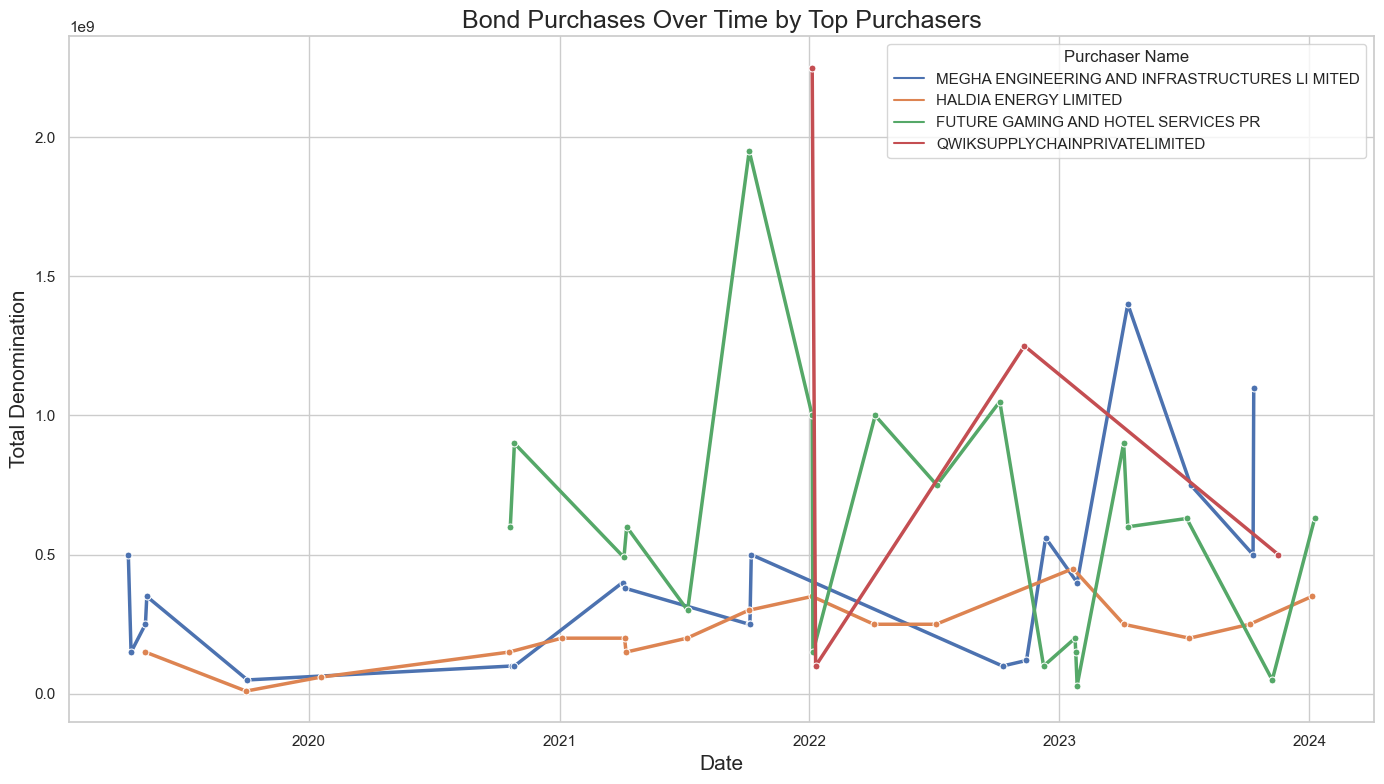

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Setting the visual theme
sns.set(style="whitegrid")

# Aggregate data to find top purchasers
top_purchasers = df.groupby('Purchaser Name')['Denomination'].sum().nlargest(4).index.tolist()

# Filter data for top purchasers
df_top_purchasers = df[df['Purchaser Name'].isin(top_purchasers)]

# Time series plot for top purchasers
plt.figure(figsize=(14, 8))
sns.lineplot(data=df_top_purchasers, x='Date', y='Denomination', hue='Purchaser Name', estimator='sum', ci=None, linewidth=2.5, marker='o', markersize=5)
plt.title('Bond Purchases Over Time by Top Purchasers', fontsize=18)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Total Denomination', fontsize=15)
plt.legend(title='Purchaser Name')
plt.tight_layout()
plt.show()

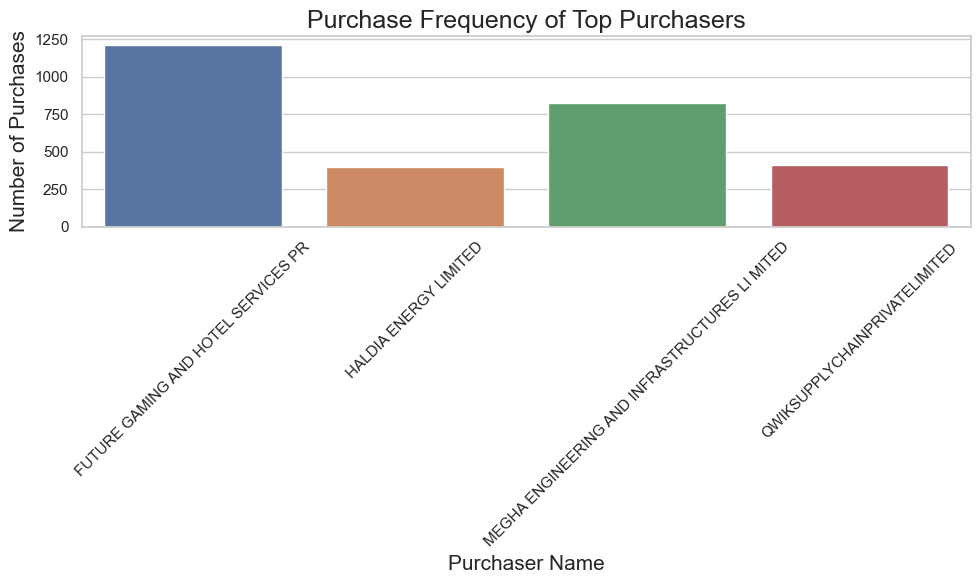

In [17]:
# Count purchases by top purchasers
purchase_freq = df_top_purchasers.groupby('Purchaser Name')['Date'].count().reset_index()

# Bar plot for purchase frequency
plt.figure(figsize=(10, 6))
sns.barplot(data=purchase_freq, x='Purchaser Name', y='Date')
plt.title('Purchase Frequency of Top Purchasers', fontsize=18)
plt.xlabel('Purchaser Name', fontsize=15)
plt.ylabel('Number of Purchases', fontsize=15)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\snehi\AppData\Local\Temp\ipykernel_2028\3249197258.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top_purchasers['Month'] = df_top_purchasers['Date'].dt.month


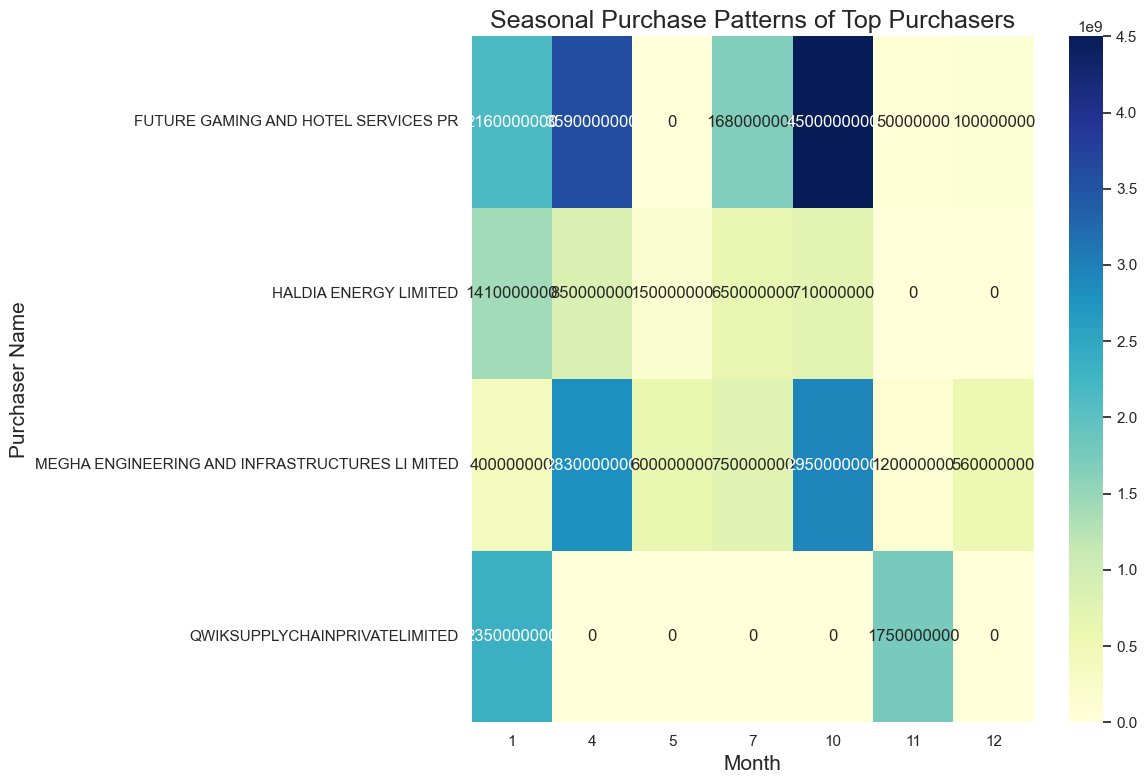

In [18]:
# Monthly purchases by top purchasers
df_top_purchasers['Month'] = df_top_purchasers['Date'].dt.month
monthly_purchases = df_top_purchasers.groupby(['Purchaser Name', 'Month'])['Denomination'].sum().unstack(fill_value=0)

# Heatmap of monthly purchases
plt.figure(figsize=(12, 8))
sns.heatmap(monthly_purchases, cmap="YlGnBu", annot=True, fmt="d")
plt.title('Seasonal Purchase Patterns of Top Purchasers', fontsize=18)
plt.xlabel('Month', fontsize=15)
plt.ylabel('Purchaser Name', fontsize=15)
plt.tight_layout()
plt.show()

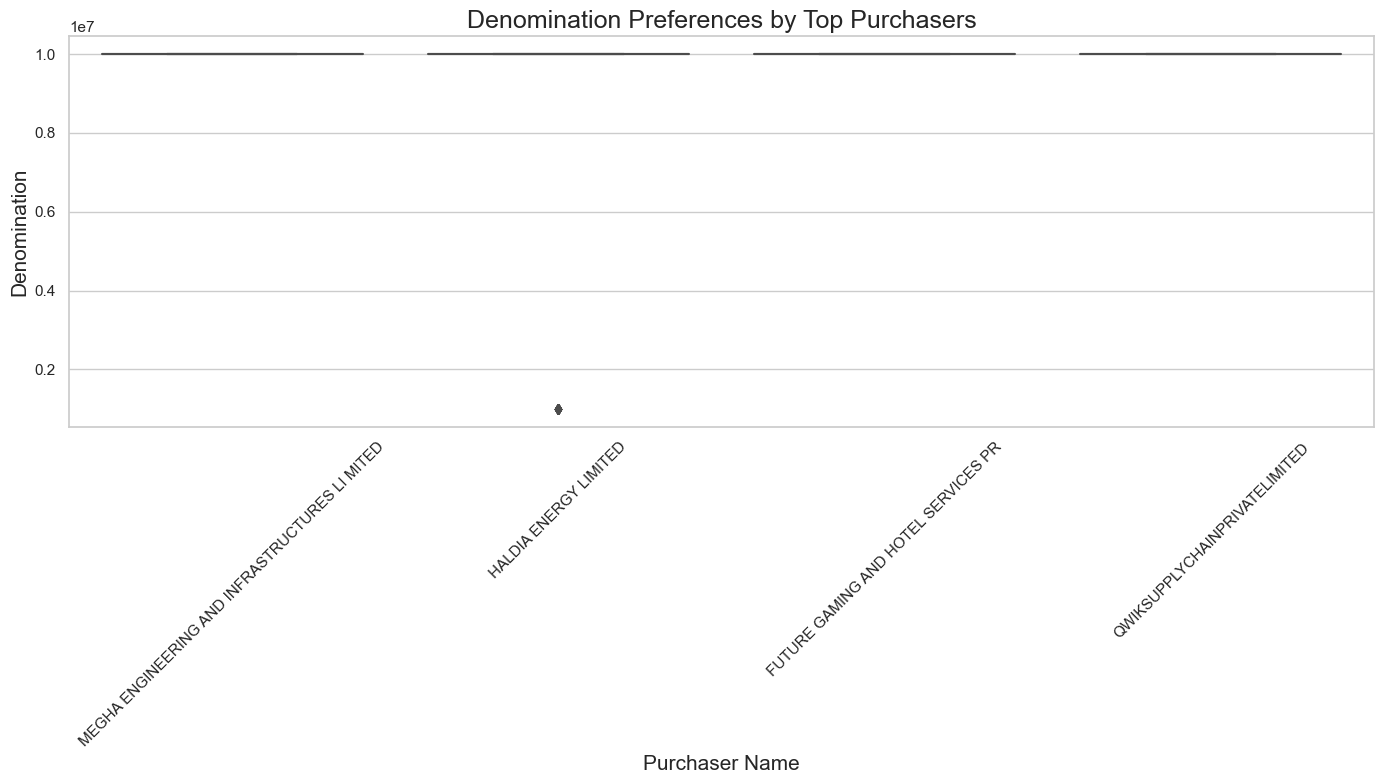

In [19]:
# Plotting the distribution of denominations for each top purchaser
plt.figure(figsize=(14, 8))
sns.boxplot(x='Purchaser Name', y='Denomination', data=df_top_purchasers)
plt.title('Denomination Preferences by Top Purchasers', fontsize=18)
plt.xlabel('Purchaser Name', fontsize=15)
plt.ylabel('Denomination', fontsize=15)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

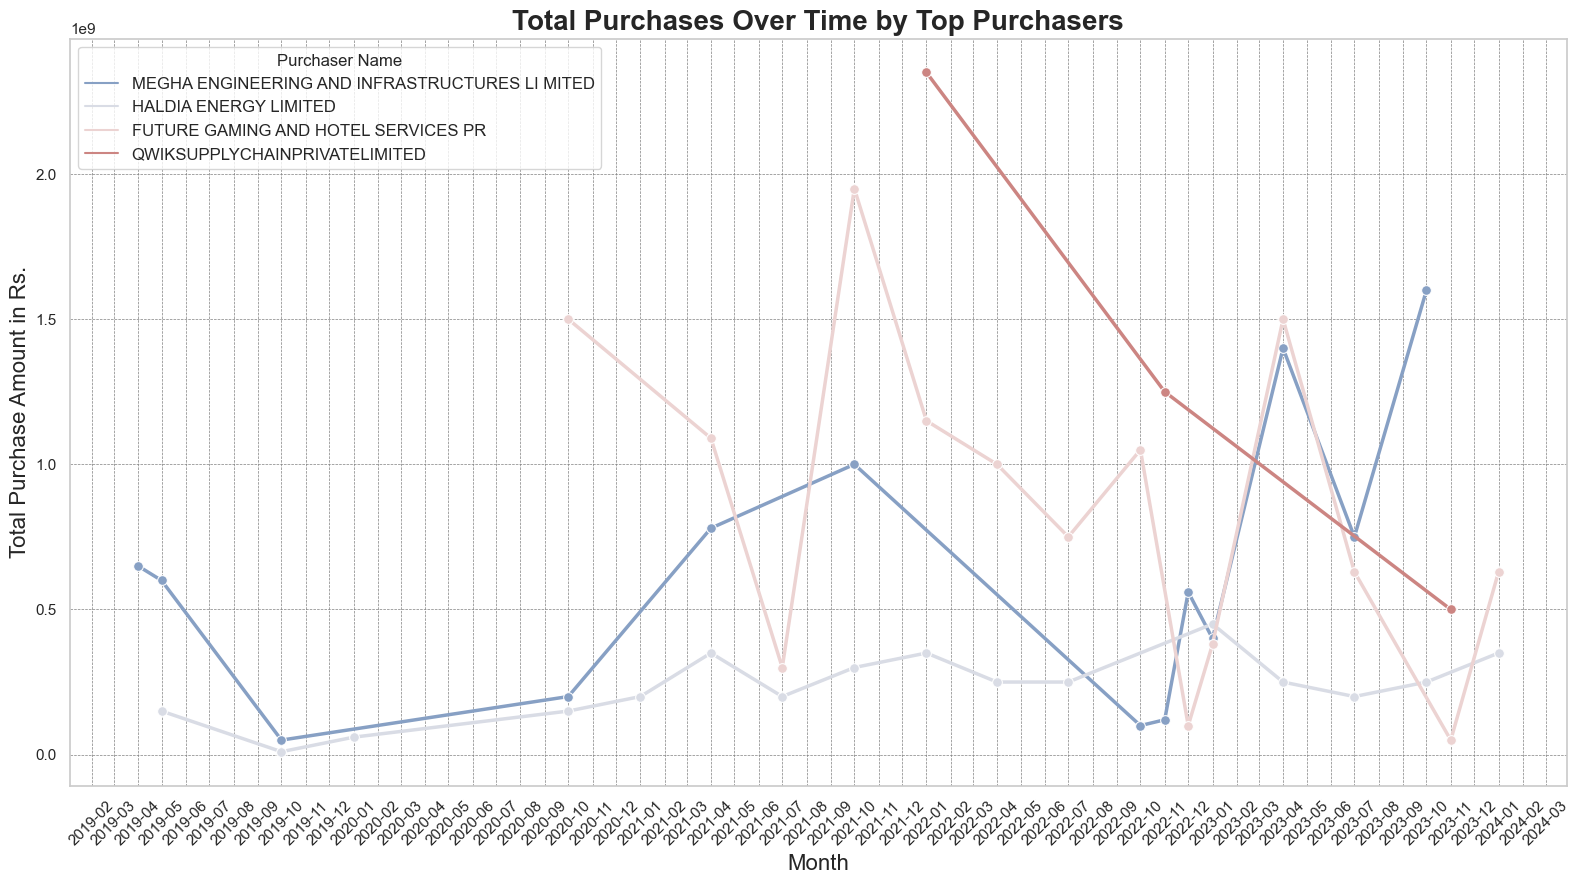

In [27]:
# Assuming 'Date' is already in datetime format and df is your DataFrame

# Creating a 'Month' column as Timestamp at the first day of each month for easier plotting
df['Month'] = df['Date'].dt.to_period('M').dt.to_timestamp()

# Filter data for top purchasers if not already done
top_purchasers = df.groupby('Purchaser Name')['Denomination'].sum().nlargest(4).index.tolist()
df_top_purchasers = df[df['Purchaser Name'].isin(top_purchasers)]

# Aggregating monthly totals for visualization
monthly_totals = df_top_purchasers.groupby(['Month', 'Purchaser Name'])['Denomination'].sum().reset_index()

# Set up the visual style
sns.set(style="whitegrid")
palette = sns.color_palette("vlag", len(top_purchasers))

# Plot
plt.figure(figsize=(16, 9))
sns.lineplot(data=monthly_totals, x='Month', y='Denomination', hue='Purchaser Name', palette=palette, linewidth=2.5, marker='o', markersize=7)

# Improving the aesthetics and readability
plt.title('Total Purchases Over Time by Top Purchasers', fontsize=20, fontweight='bold')
plt.xlabel('Month', fontsize=16)
plt.ylabel('Total Purchase Amount in Rs.', fontsize=16)
plt.xticks(rotation=45)

# Enhance date formatting
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.grid(True, linestyle='--', linewidth='0.5', color='gray')
plt.legend(title='Purchaser Name', fontsize='12', loc='upper left')
plt.tight_layout()
plt.savefig('top4_purchase_trends.jpg')
plt.show()

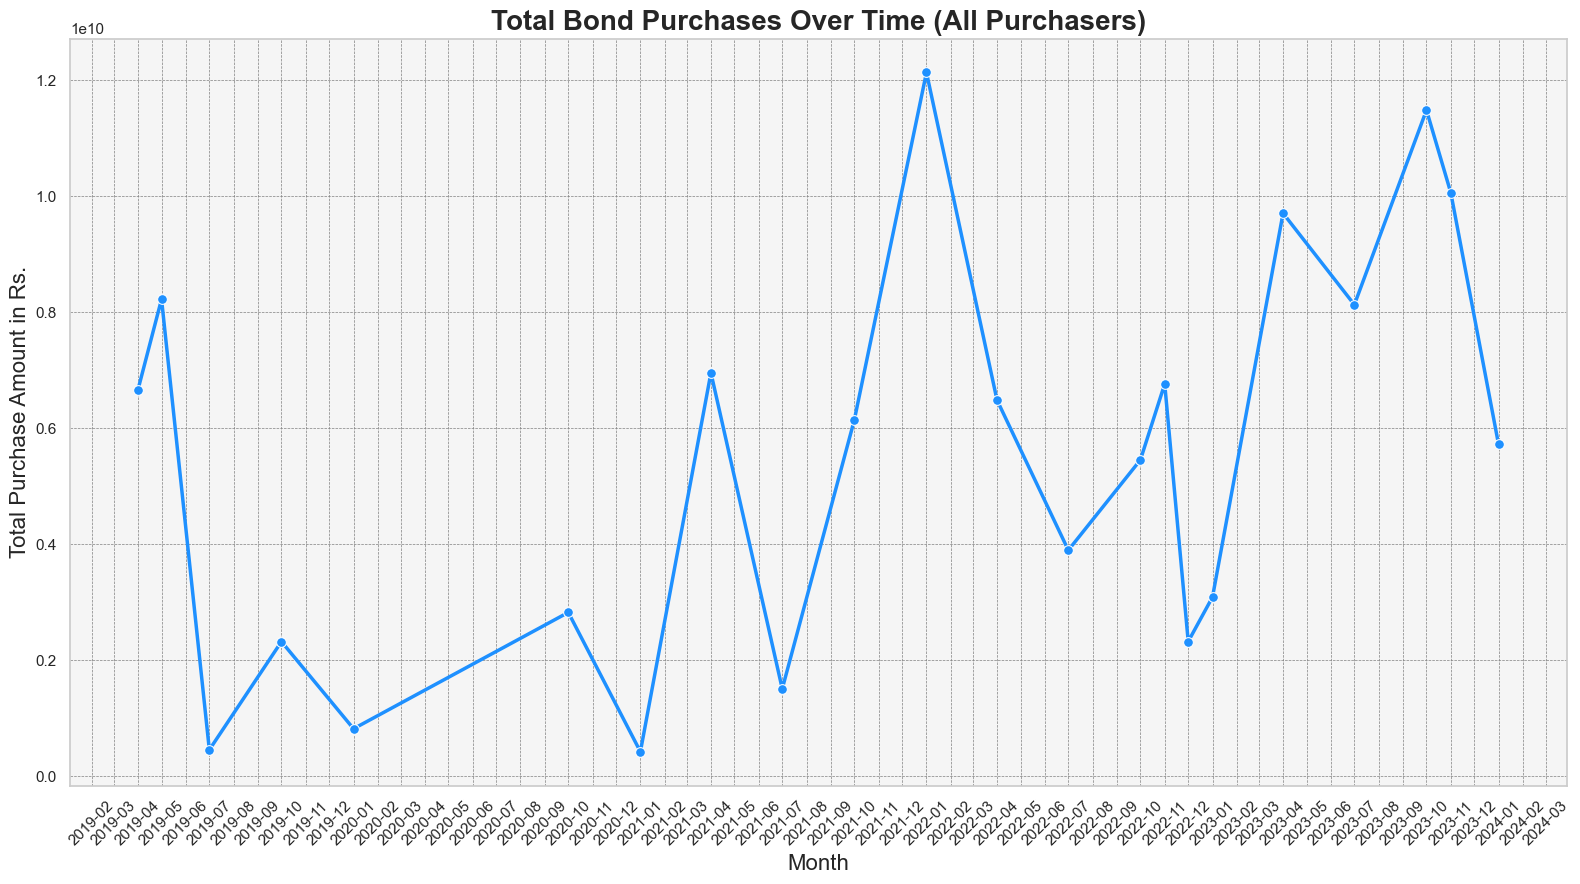

In [28]:


# Ensure 'Date' is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Creating a 'Month' column as Timestamp for easier plotting
df['Month'] = df['Date'].dt.to_period('M').dt.to_timestamp()

# Aggregate data to get monthly totals across all purchasers
monthly_totals_all = df.groupby('Month')['Denomination'].sum().reset_index()

# Setting visual theme
sns.set(style="whitegrid")

# Choose a visually appealing color palette
palette = sns.color_palette("coolwarm", as_cmap=True)

# Plotting the total purchases over time for all purchasers
plt.figure(figsize=(16, 9))
sns.lineplot(data=monthly_totals_all, x='Month', y='Denomination', linewidth=2.5, color="dodgerblue", marker='o', markersize=7)

# Enhancing the plot with titles, labels, and formatting
plt.title('Total Bond Purchases Over Time (All Purchasers)', fontsize=20, fontweight='bold')
plt.xlabel('Month', fontsize=16)
plt.ylabel('Total Purchase Amount in Rs.', fontsize=16)

# Date formatting for better readability
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=45)

# Adding gridlines and background color for better aesthetics
plt.grid(True, linestyle='--', linewidth='0.5', color='gray')
plt.gca().set_facecolor('whitesmoke')
plt.tight_layout()
plt.savefig('overall_purchase_trend.jpg')

plt.show()